In [1]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 274 kB 8.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=3312cad555b32b60b400c2cd5d521f212bc2dfeabb1c00971cbbdc208c000bb2
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 14 kB/s 
     |████████████████████████████████| 17.3 MB 172 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successf

In [2]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 1.8 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 30.3 MB/s 
     |████████████████████████████████| 130 kB 67.5 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 745 kB 66.7 MB/s 
     |████████████████████████████████| 743 kB 39.6 MB/s 
     |████████████████████████████████| 112 kB 73.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210825-py3-none-any.whl size=60661 sha256=7e9063c056e57ab828fbdf72d694abcc9c8f67ce4f1fb0063843b9093dc5deb2
  Stored in directory: /root/.cache/pip/wheels/53/c4/f8/c4cb07f135845218b019b4a55d8a0470a0f21ee13f8dcd16be
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=151f3092d4c9fd1b4529797963bc35df470202994f0da2ca4efc386f906c65

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")  

1.8.0+cu101 True


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()


import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

#  detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

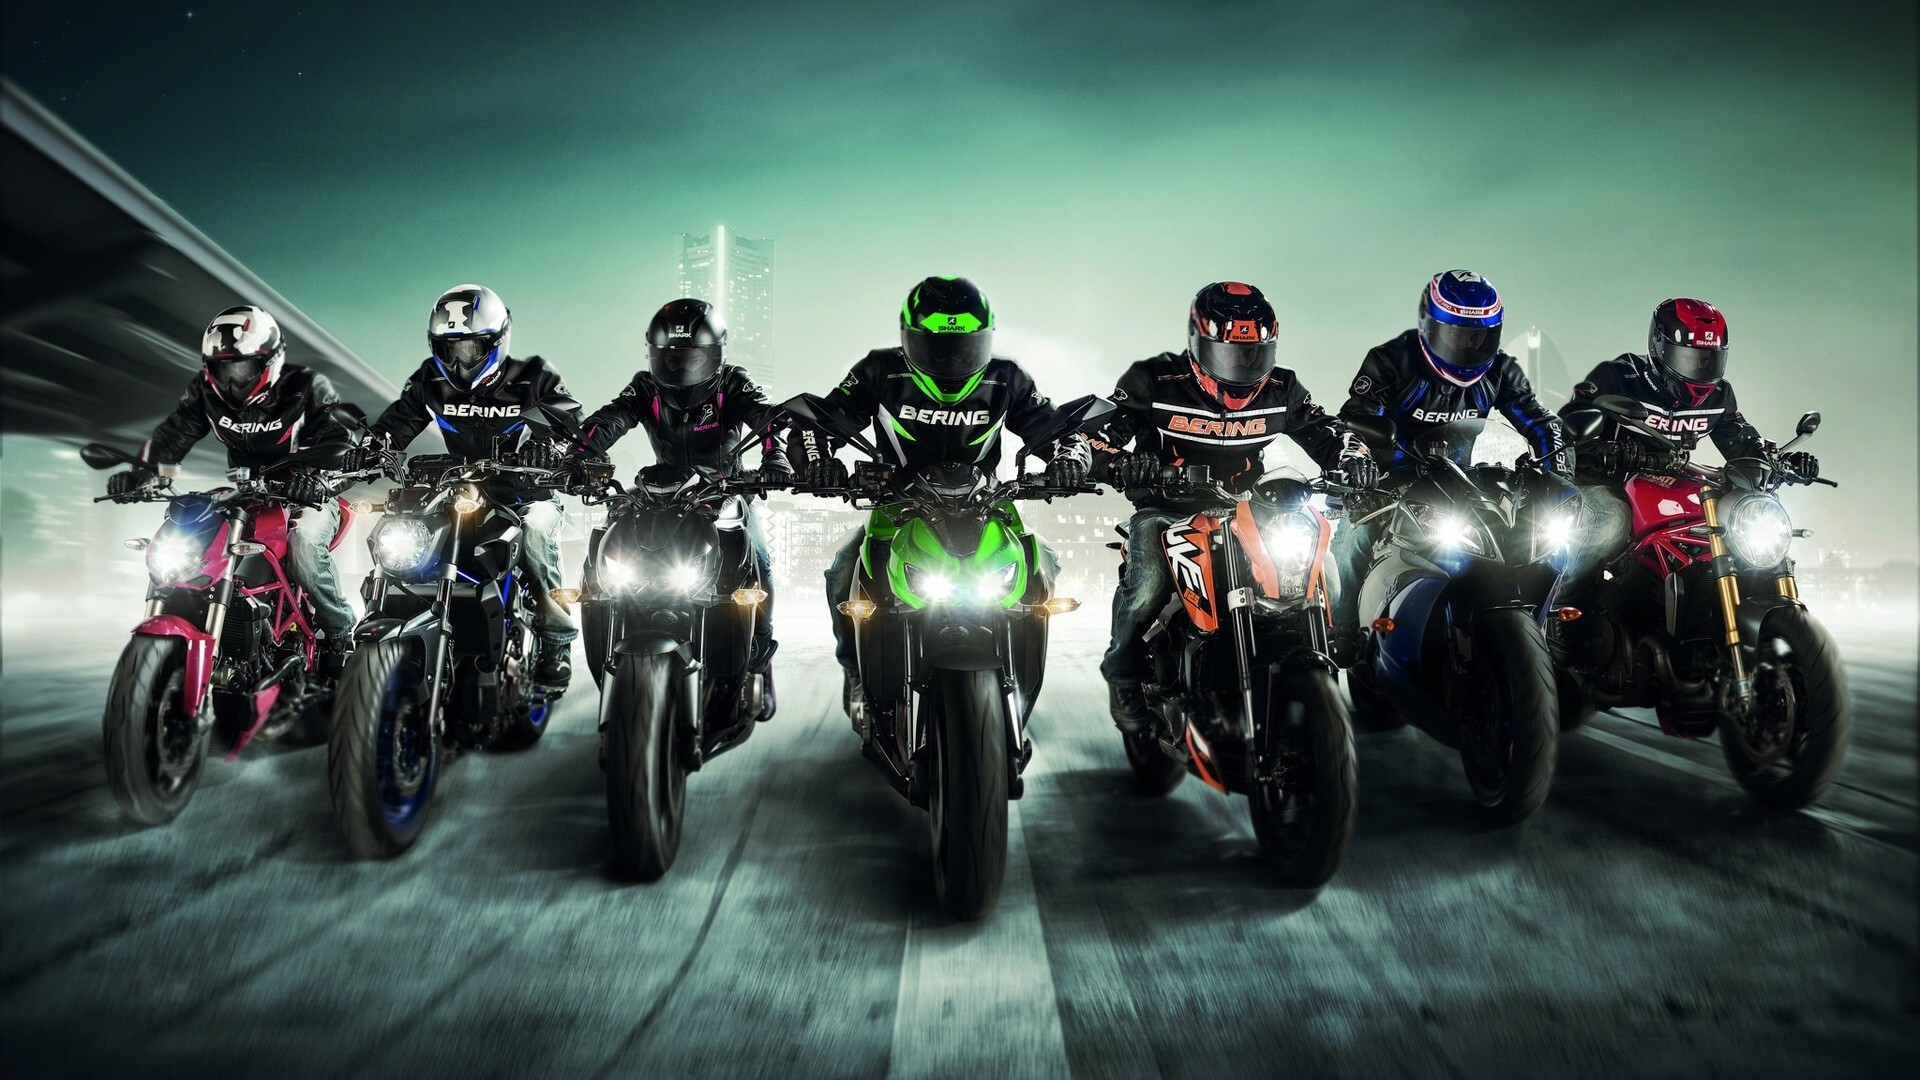

In [9]:
!wget https://images.hdqwalls.com/download/bikes-1920x1080.jpg -q -O input.jpg
im = cv2.imread("/content/input.jpg")
cv2_imshow(im)

In [10]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.0


In [11]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       device='cuda:0')
Boxes(tensor([[ 119.5890,  303.4439,  368.1035,  669.4628],
        [ 323.6189,  416.1112,  598.3568,  856.6317],
        [ 558.8365,  447.1184,  794.2045,  883.3799],
        [  90.7719,  452.4095,  359.8070,  810.9120],
        [1090.6224,  419.9226, 1385.3326,  893.6066],
        [1542.7885,  406.1956, 1847.7252,  817.8735],
        [ 802.2244,  453.3886, 1088.7194,  923.7581],
        [1340.5739,  436.7840, 1613.2319,  820.1647],
        [1330.7853,  270.4691, 1575.7207,  719.0963],
        [ 768.7869,  277.1466, 1119.4009,  752.0101],
        [ 364.2876,  288.5330,  595.6111,  688.0300],
        [1058.9791,  281.5164, 1354.4167,  770.3213],
        [1554.9114,  294.4352, 1808.3005,  691.8680],
        [ 558.8610,  301.3253,  792.9216,  720.1951],
        [1338.8232,  270.4447, 1569.7588,  487.2003],
        [ 365.9873,  282.4460,  591.4120,  470.7384],
        [ 566.9058,  297.4909,  795.9

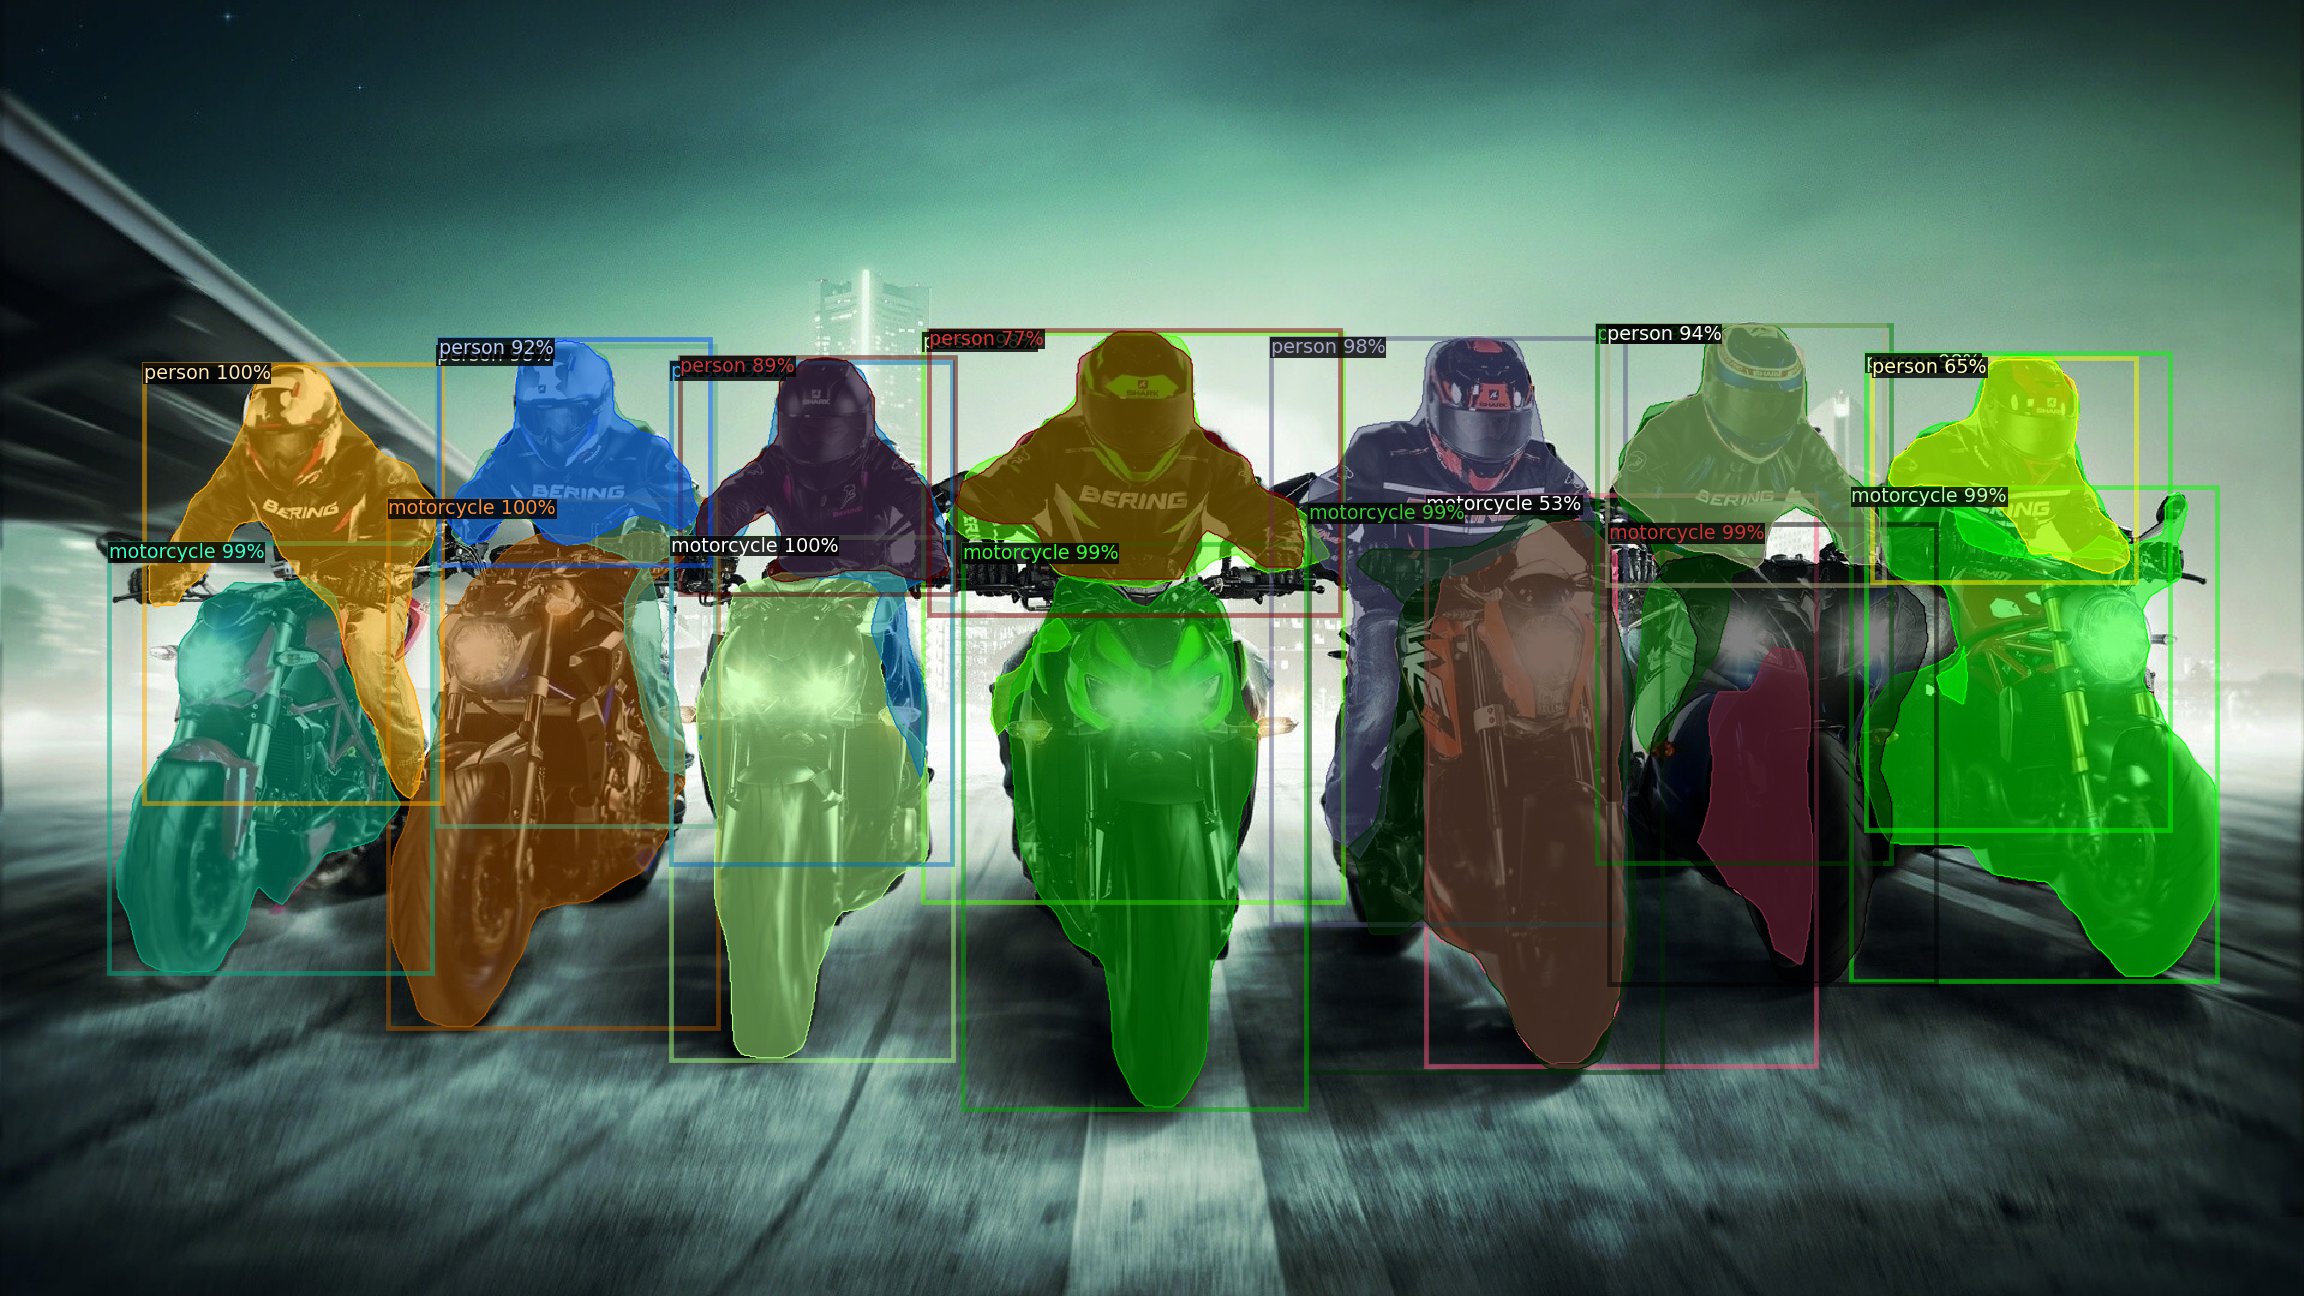

In [12]:
#  `Visualizer` drawS the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])